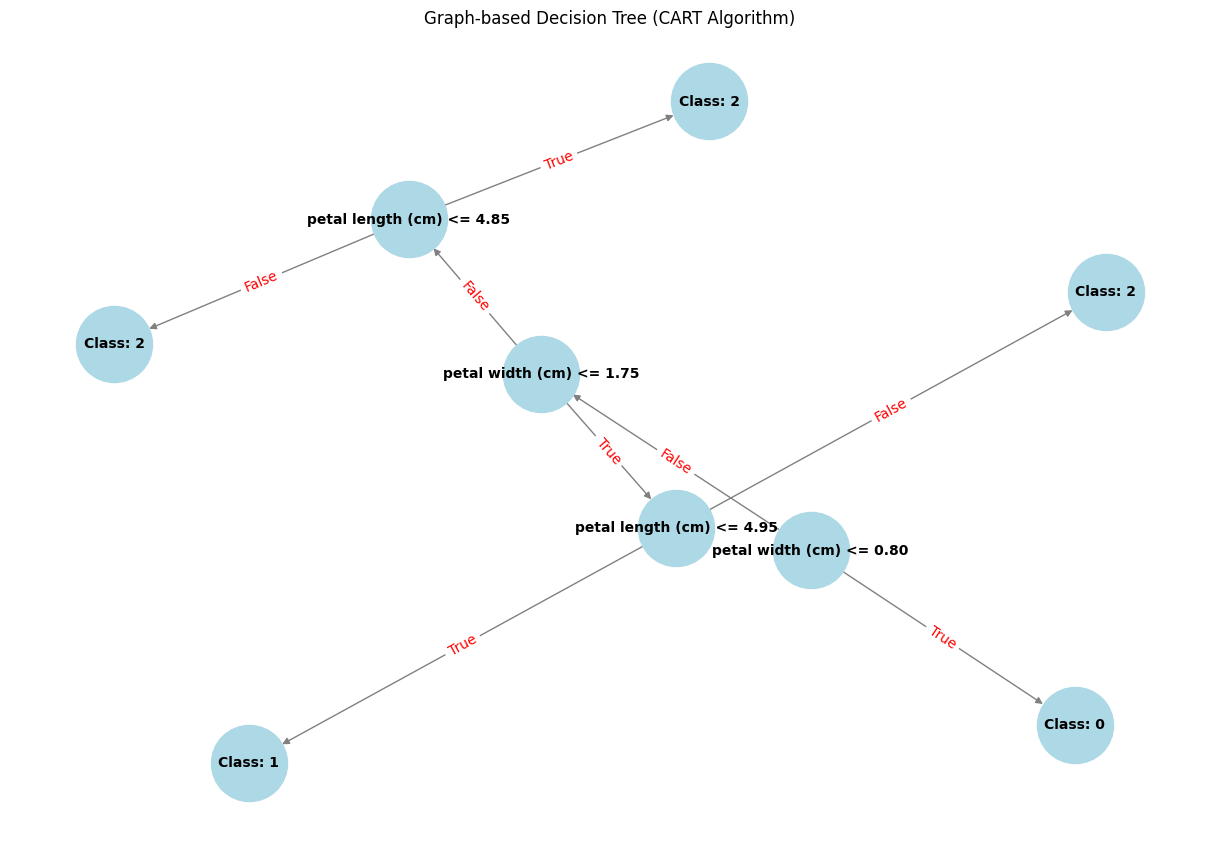

In [1]:
# Import necessary libraries
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, _tree


iris = load_iris()
X = iris.data  # Features
y = iris.target  # Labels

# Train the Decision Tree (CART)
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=1)
clf.fit(X, y)


def build_graph_from_tree(tree, feature_names):

    G = nx.DiGraph()


    def recurse(node, depth, parent=None, edge_label=""):
        if tree.feature[node] != _tree.TREE_UNDEFINED:
            # Decision split node
            name = f"{feature_names[tree.feature[node]]} <= {tree.threshold[node]:.2f}"
            G.add_node(node, label=name)
            if parent is not None:
                G.add_edge(parent, node, label=edge_label)

            # Left and right child
            recurse(tree.children_left[node], depth + 1, node, "True")
            recurse(tree.children_right[node], depth + 1, node, "False")
        else:
            # Leaf node
            name = f"Class: {np.argmax(tree.value[node])}"
            G.add_node(node, label=name)
            if parent is not None:
                G.add_edge(parent, node, label=edge_label)


    recurse(0, 0)
    return G


tree = clf.tree_
G = build_graph_from_tree(tree, iris.feature_names)


def plot_graph(G):
    pos = nx.spring_layout(G)
    labels = nx.get_node_attributes(G, 'label')
    edge_labels = nx.get_edge_attributes(G, 'label')


    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, labels=labels, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

    plt.title("Graph-based Decision Tree (CART Algorithm)")
    plt.show()


plot_graph(G)
